# Cryosphere Community Datapool (CCD)
## V0.1 Usage Examples

Author: Lawrence Bird

Email: lawrence.bird@anu.edu.au

In [1]:
import sys
sys.path.append('/scratch/tm70/lb9857/access-cryosphere-data-pool/src/')
import data_pool as dp
import matplotlib.pyplot as plt
import numpy as np

CCD Python tools are built around a central `datasets.yaml` file. This file contains all the necessary information to load any given dataset using the `load_dataset` function. The general structure of the YAML is as follows:
```
datasets:
    dataset_name:
        # Dataset-level metadata fields
        display_name: <COMMON DATASET NAME>
        path: <PATH TO DATASET DIRECTORY>
        description: <GENERAL DATASET DESCRIPTION>
        tags:
            - TAG 1
            - TAG 2
            ...
            - TAG N
        loader: <NAME OF CUSTOM LOADER REQUIRED TO LOAD DATASET>
        extension: <EXTENSION FOR FILE(S) TO LOAD>
            v1: <VERSION-SPECIFIC EXTENSION FOR FILE(S) TO LOAD>
            v2: <VERSION-SPECIFIC EXTENSION FOR FILE(S) TO LOAD>
            ...
            vN: <VERSION-SPECIFIC EXTENSION FOR FILE(S) TO LOAD>
                
        # Version-specific metadata fields
        ignore_dirs:
            v1:
                - <IGNORE DIRECTORY IN path>
                - <IGNORE DIRECTORY IN path>
                - <IGNORE DIRECTORY IN path>
        ignore_files:
            v1: 
                - <IGNORE FILE IN path>
                - <IGNORE FILE IN path>
                ...
                - <IGNORE FILE IN path>
        resolutions:
            v1: 
                annual:
                    resolution_1: <PATTERN IN FILENAME(s)>
                    resolution_2: <PATTERN IN FILENAME(s)>
                    ...
                    resolution_n: <PATTERN IN FILENAME(S)>
                composite:
                    resolution_1: <PATTERN IN FILENAME(S)>
                    resolution_2: <PATTERN IN FILENAME(S)>
                    ...
                    resolution_n: <PATTERN IN FILENAME(S)>
        composite_patterns:
            v1:
                - <PATTERN IN FILENAME(S)>
                - <PATTERN IN FILENAME(S)>
                ...
                - <PATTERN IN FILENAME(S)>
        subdatasets:
            v1:
                subdataset_name:
                    subpath: <PATH TO SUBDATASET DIRECTORY>
                    extension: <SUBSET-SPECIFIC EXTENSION FOR FILE(S) TO LOAD>
                    no_data_value: <SUBSET-SPECIFIC VALUE TO USE FOR NO-DATA>
                    skip_lines: <SUBSET-SPECIFIC VALUE TO USE FOR skip_rows WHEN READING CSV FILES>
                    ignore_dirs: <SUBSET-SPECIFIC DIRECTORIES TO IGRNORE WITHIN subpath>
                    
```
**NOTE: any subdataset-specific definitions over-write dataset-level definitions. For example, if `reoslution` is defined at the dataset-level, this resolution is applied to all subdatasets, unless `resolution` is explicitly stated within a specific subdataset.**

Version information is inferred from the directory structure. All datasets must have a `v1` sub-directory, at a minimum. For example, all `elevation_geometry` datasets included in the datapool are structured as follows:
```
.
├── bedmap
│   ├── v1
│   ├── v2
│   └── v3
├── measures_bedmachine_antarctica
│   ├── v1
│   ├── v2
│   └── v3
├── measures_its_live_antarctic_annual_240m_ice_sheet_extent_masks_1997_2021
│   └── v1
├── measures_its_live_antarctic_grounded_ice_sheet_elevation_change
│   └── v1
└── measures_its_live_antarctic_quarterly_1920m_ice_shelf_height_change_and_basal_melt_rates_1992_2017
    └── v1
```

A few example datasets are included below:

- Single-file, static-in-time, datasets:
```
  measures_bedmachine_antarctica:
    display_name: BedMachine Antarctica
    path: /g/data/av17/access-nri/cryosphere-data-pool/elevation_geometry/measures_bedmachine_antarctica
    description: High-resolution bed topography and ice thickness data for Antarctica.
    tags:
      - antarctica
      - bed topography
      - ice thickness
      - surface elevation
      - bed uncertainty
      - ice mask
    extension: nc
```

- Subdatasets, with different formats and versions across versions, and different directories to be ignored in each subdataset:
```
  bedmap:
    display_name: Bedmap
    path: /g/data/av17/access-nri/cryosphere-data-pool/elevation_geometry/bedmap
    description: Gridded, geospatial, and point datasets of Antarctic ice thickness, surface elevation, and bed elevation.
    tags:
      - antarctica
      - bed topography
      - ice thickness
      - surface elevation
    subdatasets:
      # Define version-level subdatasets and subdataset-specific fields (e.g. extensions, skip_lines, no_data_value)
      v1:
        geospatial:
          subpath: geospatial_data
          extension: gpkg
          no_data_value: -9999
        points:
          subpath: point_data
          extension: csv
          skip_lines: 18
          no_data_value: -9999
        gridded:
          subpath: gridded_data
          extension: tif
      v2:
        geospatial:
          subpath: geospatial_data
          extension: gpkg
          no_data_value: -9999
          ignore_dirs:
            - shapeLines
        points:
          subpath: point_data
          extension: csv
          skip_lines: 18
          no_data_value: -9999
        gridded:
          subpath: gridded_data
          extension: tif
          ignore_dirs:
            - resources
      v3:
        geospatial:
          subpath: geospatial_data
          extension: gpkg
          no_data_value: -9999
          ignore_dirs:
            - shapeLines
        points:
          subpath: point_data
          extension: csv
          skip_lines: 18
          no_data_value: -9999
        gridded:
          subpath: gridded_data
          extension: nc
          ignore_dirs:
            - bm3_streamlines_pt
```
- Different extensions at the version-level (no subdatasets):
```
  measures_antarctic_grounding_line:
    display_name: Antarctic Grounding Line from Differential Satellite Radar Interferometry
    path: /g/data/av17/access-nri/cryosphere-data-pool/geospatial/measures_antarctic_grounding_line_from_differential_satellite_radar_interferometry
    description: Grounding line positions for Antarctica derived from differential satellite radar interferometry.
    tags:
      - antarctica
      - grounding line
    # Define version-specific extensions for the dataset
    extension:
      v1: csv
      v2: shp
```
- Custom loader:
```
 measures_insar_based_ice_velocity_maps_of_central_antarctica:
    path: /g/data/av17/access-nri/cryosphere-data-pool/ice_velocity/measures_insar_based_ice_velocity_maps_of_central_antarctica
    display_name: InSAR-based Ice Velocity Maps of Central Antarctica
    description: Ice velocity maps for central Antarctica derived from Interferometric Synthetic Aperture Radar (InSAR) data.
    tags:
      - antarctica
      - ice velocity
      - insar
    extension: nc
    # Define a custom loader for this dataset
    loader: measures_velocity
```
- Different resolutions for annual/composite files available for different datasets:
```
  measures_its_live_regional_glacier_and_ice_sheet_surface_velocities:
    path: /g/data/av17/access-nri/cryosphere-data-pool/ice_velocity/measures_its_live_regional_glacier_and_ice_sheet_surface_velocities
    display_name: ITS_LIVE Regional Glacier and Ice Sheet Surface Velocities
    description: ITS_LIVE regional glacier and ice sheet surface velocities for Antarctica and Greenland.
    tags:
      - antarctica
      - greenland
      - ice velocity
    extension: nc
    loader: measures_velocity

    # Version-sepcific, dataset-level resolutions
    resolutions:
      v1: 
        annual:
          240m: G0240
        composite:
          120m: G0120
          240m: G0240

    # Version-specific file patterns for composite files
    composite_patterns:
      v1: "_0000"
      v2: "_2014-2022_"
      
    subdatasets:
      v1:
        ANT:
          subpath: ANT
        ALA:
          subpath: ALA
          # Overwrite dataset-level resolutions for this subdataset
          resolutions:
            annual:
              120m: G0120
              240m: G0240
            composite:
              120m: G0120
              240m: G0240
        CAN:
          subpath: CAN
        GRE:
          subpath: GRE
        HMA:
          subpath: HMA
        ICE: 
          subpath: ICE
        PAT: 
          subpath: PAT
        SRA:
          subpath: SRA
          # Overwrite dataset-level resolutions for this subdataset
          resolutions:
            annual:
              120m: G0120
              240m: G0240
            composite:
              120m: G0120
              240m: G0240
      v2:
        RGI01A:
          subpath: RGI01A
        RGI02A:
          subpath: RGI02A
        RGI03A: 
          subpath: RGI03A
        RGI04A:
          subpath: RGI04A
        RGI05A:
          subpath: RGI05A
        RGI06A:
          subpath: RGI06A
        RGI07A:
          subpath: RGI07A
        RGI08A:
          subpath: RGI08A
        RGI09A:
          subpath: RGI09A
        RGI10A:
          subpath: RGI10A
        RGI11A:
          subpath: RGI11A
        RGI12A:
          subpath: RGI12A
        RGI13A:
          subpath: RGI13A
        RGI14A:
          subpath: RGI14A
        RGI15A:
          subpath: RGI15A
        RGI16A:
          subpath: RGI16A
        RGI17A:
          subpath: RGI17A
        RGI18A:
          subpath: RGI18A
        RGI19A:
          subpath: RGI19A
```

## 1. Initialise and interrogate the datatpool

In [2]:
# Initialise the datapool using the YAML file provided (or a user-modified equivalent)
catalog = dp.catalog.DataCatalog('/scratch/tm70/lb9857/access-cryosphere-data-pool/src/data_pool/config/datasets.yaml')


In [3]:
# List all datasets within the catalog (returns a pandas dataframe of all metadata)
catalog.datasets

,dataset,display_name,description,tags,version,subdataset,path,full_path,extension,skip_lines,no_data_value,ignore_dirs,ignore_files,loader,resolutions,composite_patterns
0,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
1,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v2,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
2,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v3,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
3,bedmap,Bedmap,"Gridded, geospatial, and point datasets of Ant...","[antarctica, bed topography, ice thickness, su...",v1,geospatial,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,gpkg,0,-9999.0,[],[],default,None,[]
4,bedmap,Bedmap,"Gridded, geospatial, and point datasets of Ant...","[antarctica, bed topography, ice thickness, su...",v1,points,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,csv,18,-9999.0,[],[],default,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI17A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
62,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI18A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
63,measures_its_live_regional_glacier_and_ice_she...,ITS_LIVE Regional Glacier and Ice Sheet Surfac...,ITS_LIVE regional glacier and ice sheet surfac...,"[antarctica, greenland, ice velocity]",v2,RGI19A,/g/data/av17/access-nri/cryosphere-data-pool/i...,/g/data/av17/access-nri/cryosphere-data-pool/i...,nc,0,NaN,[],[],measures_velocity,None,[_2014-2022_]
64,racmo2.3p2_monthly_27km_1979-2022,RACMO2.3p2 Monthly Surface Mass Balance and Cl...,Regional Atmospheric Climate Model (RACMO) ver...,"[antarctica, surface mass balance, climate dat...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/s...,/g/data/av17/access-nri/cryosphere-data-pool/s...,nc,0,NaN,[],"[Height_latlon_ANT27.nc, TotIS_RACMO_ANT27_IMB...",racmo,None,[]


In [4]:
# Search the catalog based on display_name, tags, or dataset_name. Here, explore bedmachine datasets
catalog.search('bedmachine')

,dataset,display_name,description,tags,version,subdataset,path,full_path,extension,skip_lines,no_data_value,ignore_dirs,ignore_files,loader,resolutions,composite_patterns
0,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v1,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
1,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v2,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]
2,measures_bedmachine_antarctica,BedMachine Antarctica,High-resolution bed topography and ice thickne...,"[antarctica, bed topography, ice thickness, su...",v3,None,/g/data/av17/access-nri/cryosphere-data-pool/e...,/g/data/av17/access-nri/cryosphere-data-pool/e...,nc,0,NaN,[],[],default,None,[]


## Loading Datasets

To load a dataset, we use the `load_dataset` function. This accepts various keyword arguments, depending on the dataset. At a minimum it requires `dataset_name` and `version` arguments.

Other arguments include:
- `subdataset` [str]- this is the name of the subdataset to be loaded
- `resolution` [str] - this is the requested resolution to be loaded. Currently only supported for `measures_its_live_regional_glacier_and_ice_sheet_surface_velocities`
- `composite` [bool] - should the composite file be loaded, or the annual series. Default = False

In [5]:
# Load a simple dataset
bedmachine_v1 = catalog.load_dataset('measures_bedmachine_antarctica', version = 'v1')
bedmachine_v1

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


<xarray.Dataset> Size: 4GB
Dimensions:    (y: 13333, x: 13333)
Coordinates:
  * y          (y) int32 53kB 3333000 3332500 3332000 ... -3332500 -3333000
  * x          (x) int32 53kB -3333000 -3332500 -3332000 ... 3332500 3333000
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 178MB dask.array<chunksize=(1905, 1905), meta=np.ndarray>
    firn       (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    surface    (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    thickness  (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    bed        (y, x) float32 711MB dask.array<chunksize=(953, 953), meta=np.ndarray>
    errbed     (y, x) float32 711MB dask.array<chunksize=(1334, 1334), meta=np.ndarray>
    source     (y, x) int8 178MB dask.array<chunksize=(1905, 1905), meta=np.ndarray>
    geoid      (y, x) int16 356MB dask.array<chunksize=(1334, 1334), meta=np.ndarray>
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     05-Nov-2019 (v1.38)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...

In [6]:
# Load a specific subdataset. The 'type' returned depends on the dataset.
measures_antarctic_boundaries = catalog.load_dataset('measures_antarctic_boundaries', version = 'v2', subdataset = 'grounding_line')
measures_antarctic_boundaries

,NAME,TYPE,geometry
0,Grounded,GR,"MULTIPOLYGON (((-217776.532 2130382.522, -2168..."


<Axes: xlabel='Cartesian x-coordinate [meter]', ylabel='Cartesian y-coordinate [meter]'>

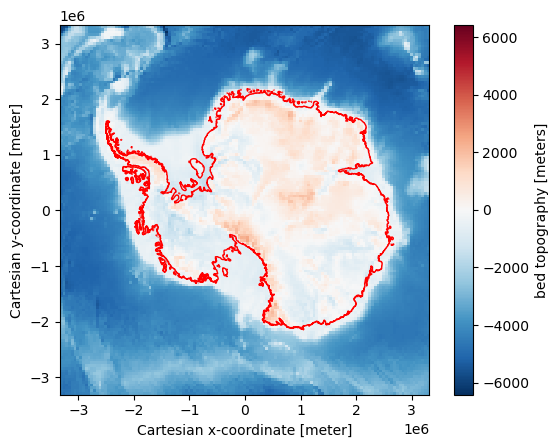

In [8]:
# Construct a simple figure

# Coarsen bed topogrpahy for improved render time
bed = bedmachine_v1.bed.coarsen(x = 100, y = 100, boundary = 'trim').mean()

# Plot bed topography
fig, ax = plt.subplots()
bed.plot(ax=ax)

# Add grounding line
measures_antarctic_boundaries.plot(ax = ax, edgecolor = 'red', facecolor = 'none')

In [9]:
# Load velocity data & coarsen to reduce rendering time
vel_data = catalog.load_dataset('measures_its_live_regional_glacier_and_ice_sheet_surface_velocities', version = 'v1', subdataset = 'ANT', resolution = '240m', composite = True)
vel_data

<xarray.Dataset> Size: 25GB
Dimensions:        (y: 18392, x: 22896)
Coordinates:
  * y              (y) float64 147kB 2.26e+06 2.259e+06 ... -2.154e+06
  * x              (x) float64 183kB -2.678e+06 -2.678e+06 ... 2.817e+06
Data variables: (12/14)
    chip_size_max  (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    count          (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    date           (y, x) timedelta64[ns] 3GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    dt             (y, x) timedelta64[ns] 3GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    ice            (y, x) float32 2GB dask.array<chunksize=(288, 358), meta=np.ndarray>
    mapping        float32 4B ...
    ...             ...
    v              (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    v_err          (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vx             (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vx_err         (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vy             (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
    vy_err         (y, x) float32 2GB dask.array<chunksize=(144, 358), meta=np.ndarray>
Attributes:
    Conventions:              CF-1.8
    GDAL_AREA_OR_POINT:       Area
    author:                   Alex S. Gardner, JPL/NASA
    date_created:             05-May-2019 15:53:24
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    motion_coordinates:       map
    motion_detection_method:  feature
    scene_pair_type:          optical
    title:                    autoRIFT surface velocities